In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv('asthma_dataset.csv')

In [ ]:
df.head(10)

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,NaN,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,NaN,159
5,6,23,Male,Non-Smoker,No,NaN,376
6,7,33,Female,Current Smoker,No,NaN,296
7,8,20,Male,Current Smoker,Yes,Controller Medication,322
8,9,36,Male,Current Smoker,No,NaN,175
9,10,27,Male,Ex-Smoker,No,NaN,264


In [ ]:
df.drop('Patient_ID',axis=1,inplace=True)

In [ ]:
df.shape

(300, 6)

In [ ]:

df.isna().sum()

Age                   0
Gender                0
Smoking_Status        0
Asthma_Diagnosis      0
Medication          143
Peak_Flow             0
dtype: int64

In [ ]:
df['Medication'].fillna(df['Medication'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

Age                 0
Gender              0
Smoking_Status      0
Asthma_Diagnosis    0
Medication          0
Peak_Flow           0
dtype: int64

In [ ]:
df.dtypes

Age                  int64
Gender              object
Smoking_Status      object
Asthma_Diagnosis    object
Medication          object
Peak_Flow            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Smoking_Status'] = labelencoder.fit_transform(df['Smoking_Status'])
df['Asthma_Diagnosis'] = labelencoder.fit_transform(df['Asthma_Diagnosis'])
df['Medication'] = labelencoder.fit_transform(df['Medication'])

In [ ]:
df.dtypes

Age                 int64
Gender              int64
Smoking_Status      int64
Asthma_Diagnosis    int64
Medication          int64
Peak_Flow           int64
dtype: object

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking_Status', 'Asthma_Diagnosis', 'Medication',
       'Peak_Flow'],
      dtype='object')

In [ ]:
df['Asthma_Diagnosis'].value_counts()

Asthma_Diagnosis
1    157
0    143
Name: count, dtype: int64

In [ ]:

Features = ['Age','Gender','Smoking_Status','Medication','Peak_Flow']

<Axes: >

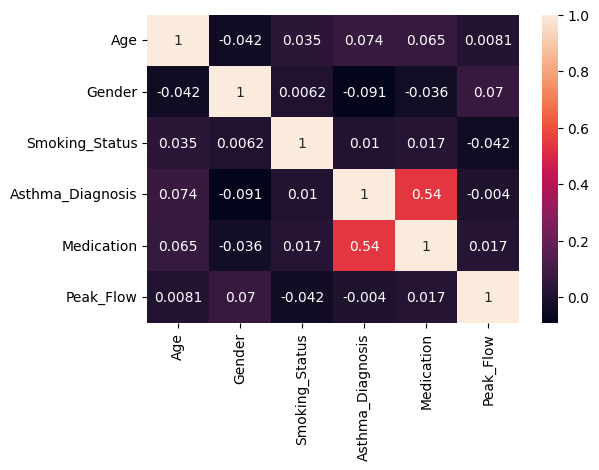

In [ ]:
plt.figure(figsize=(6,4))
c=df.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.80)

In [ ]:
X_train = train[Features]
Y_train = train['Asthma_Diagnosis']

X_test = test[Features]
Y_test = test['Asthma_Diagnosis']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [ ]:
model = LogisticRegression(max_iter = 300, random_state= 5)
model.fit(X_test, Y_test)

LogisticRegression(max_iter=300, random_state=5)

In [ ]:
model.score(X_test, Y_test)

0.8

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

[1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1]


In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[22,  4],
       [ 8, 26]])

Text(95.72222222222221, 0.5, 'real')

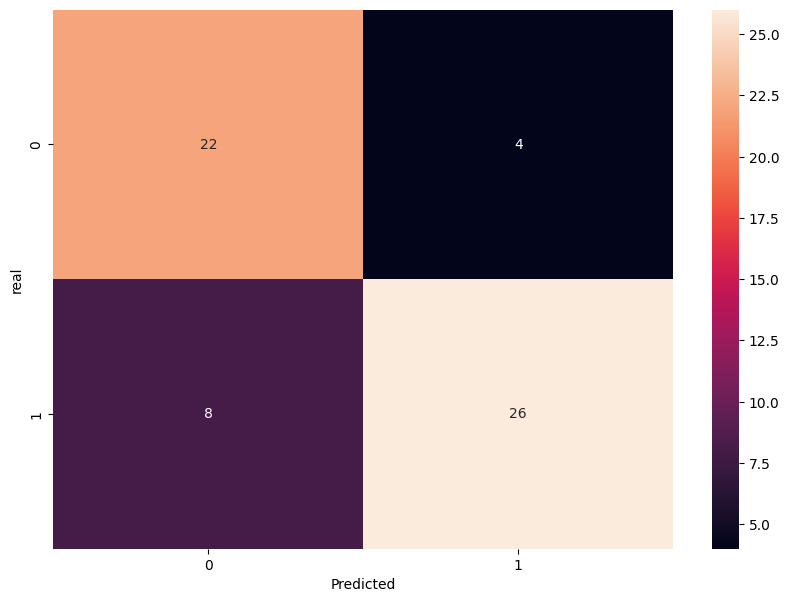

In [ ]:
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [ ]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  80.0 %,  48.0 correct detections
Inaccuracy:  20.0 %,  12.0 Incorrect detections


In [ ]:
df.loc[5]

Age                  23
Gender                1
Smoking_Status        2
Asthma_Diagnosis      0
Medication            0
Peak_Flow           376
Name: 5, dtype: int64

In [ ]:
input_data=(23,1,2,0,376)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if prediction == [1]:
  print("Asthma Predicted")
else:
  print("No Asthma Predicted")


No Asthma Predicted


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle


In [ ]:
filename = '_model.sav'
pickle.dump(model, open(filename, 'wb'))